In [713]:
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = 'F:\\thesis'
os.chdir(dir_Path)

In [714]:
import pandas as pd 

Reviewdata = pd.read_csv('Traffic_Sentimental_Analysis.csv')

In [715]:
Reviewdata.shape

(201, 7)

In [716]:
Reviewdata.head()

,Timestamp,Reason,Region,Traffic_Hour,Day,Traffic_Type,Comments
0,1/18/2021 21:55:17,Hawker on the side of the road,Bhoddarhat,Morning,Thursday,Yes,Bhoddarhat is very congested in the Morning. H...
1,1/18/2021 21:55:17,"Does not obey traffic laws, Hawker on the side...",Bohoddarhat,Noon,Thursday,Yes,Bohoddarhat is very congested in the Noon. Do...
2,1/18/2021 21:55:17,Job holder people go to the office.,pachlaish,Morning,"Saturday, Sunday, Monday, Tuesday, Wednesday, ...",No,pachlaish is very congested in the Morning. Jo...
3,1/18/2021 21:55:17,Export Import activists of CTG Port,agrabad,Dawn,"Saturday, Monday, Wednesday",No,agrabad is very congested in the Dawn. Export ...
4,1/18/2021 21:55:17,More vehicle,GEC,Mid-Morning,"Sunday, Monday, Tuesday, Wednesday, Thursday",Yes,GEC is very congested in the Mid-Morning. More...


In [717]:
#Reviewdata = pd.read_csv('Traffic_Sentimental_Analysis.csv')
#Reviewdata['Comments'] = Reviewdata['Region']+ ' '+ Reviewdata['Traffic_Hour'].astype(str)+ ' '+ Reviewdata['Day']
#Reviewdata

In [718]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Timestamp     201 non-null    object
 1   Reason        201 non-null    object
 2   Region        201 non-null    object
 3   Traffic_Hour  201 non-null    object
 4   Day           201 non-null    object
 5   Traffic_Type  201 non-null    object
 6   Comments      201 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


In [719]:
Reviewdata.describe().transpose()

,count,unique,top,freq
Timestamp,201,192,1/18/2021 21:55:17,6
Reason,201,29,"Does not obey traffic laws, Hawker on the side...",68
Region,201,64,Muradpur,14
Traffic_Hour,201,8,Mid-Morning,46
Day,201,24,"Sunday, Monday, Tuesday, Wednesday, Thursday",146
Traffic_Type,201,2,Yes,113
Comments,201,182,pachlaish is very congested in the Morning. Jo...,3


In [720]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Comments,0,0.0
Traffic_Type,0,0.0
Day,0,0.0
Traffic_Hour,0,0.0
Region,0,0.0
Reason,0,0.0
Timestamp,0,0.0


Percentage for default

Yes    56.22
No     43.78
Name: Traffic_Type, dtype: float64


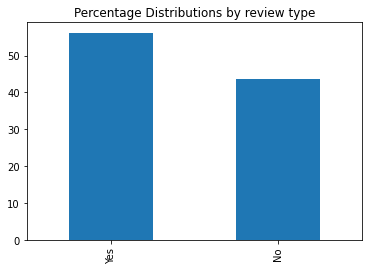

In [721]:

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Traffic_Type.value_counts(normalize=True)*100,2))
round(Reviewdata.Traffic_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

Percentage for default

Mid-Morning      22.89
Evening          20.40
Noon             15.92
Morning          14.93
Night             9.95
Afternoon         7.46
Early-Morning     5.47
Dawn              2.99
Name: Traffic_Hour, dtype: float64


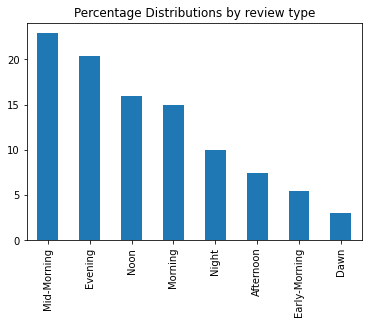

In [722]:

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Traffic_Hour.value_counts(normalize=True)*100,2))
round(Reviewdata.Traffic_Hour.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [723]:

Reviewdata.drop(columns = ['Timestamp','Traffic_Hour','Day','Reason'], inplace = True)

In [724]:

import re
import string


def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [725]:

Reviewdata['cleaned_comments'] = pd.DataFrame(Reviewdata.Comments.apply(cleaned1))
Reviewdata.head(10)

,Region,Traffic_Type,Comments,cleaned_comments
0,Bhoddarhat,Yes,Bhoddarhat is very congested in the Morning. H...,bhoddarhat is very congested in the morning ha...
1,Bohoddarhat,Yes,Bohoddarhat is very congested in the Noon. Do...,bohoddarhat is very congested in the noon doe...
2,pachlaish,No,pachlaish is very congested in the Morning. Jo...,pachlaish is very congested in the morning job...
3,agrabad,No,agrabad is very congested in the Dawn. Export ...,agrabad is very congested in the dawn export i...
4,GEC,Yes,GEC is very congested in the Mid-Morning. More...,gec is very congested in the midmorning more v...
5,Gate no Two,No,Gate no Two is very congested in the Morning. ...,gate no two is very congested in the morning h...
6,Muradpur,No,Muradpur is very congested in the Dawn. break ...,muradpur is very congested in the dawn break t...
7,Muradpur,Yes,Muradpur is very congested in the Noon. Reason...,muradpur is very congested in the noon reason ...
8,Muradpur,No,Muradpur is very congested in the Dawn. beside...,muradpur is very congested in the dawn beside ...
9,GEC,Yes,GEC is very congested in the Mid-Morning. More...,gec is very congested in the midmorning more v...


In [726]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [727]:
# Let's take a look at the updated text
Reviewdata['cleaned_comments_new'] = pd.DataFrame(Reviewdata['cleaned_comments'].apply(cleaned2))
Reviewdata.head(10)

,Region,Traffic_Type,Comments,cleaned_comments,cleaned_comments_new
0,Bhoddarhat,Yes,Bhoddarhat is very congested in the Morning. H...,bhoddarhat is very congested in the morning ha...,bhoddarhat is very congested in the morning ha...
1,Bohoddarhat,Yes,Bohoddarhat is very congested in the Noon. Do...,bohoddarhat is very congested in the noon doe...,bohoddarhat is very congested in the noon doe...
2,pachlaish,No,pachlaish is very congested in the Morning. Jo...,pachlaish is very congested in the morning job...,pachlaish is very congested in the morning job...
3,agrabad,No,agrabad is very congested in the Dawn. Export ...,agrabad is very congested in the dawn export i...,agrabad is very congested in the dawn export i...
4,GEC,Yes,GEC is very congested in the Mid-Morning. More...,gec is very congested in the midmorning more v...,gec is very congested in the midmorning more v...
5,Gate no Two,No,Gate no Two is very congested in the Morning. ...,gate no two is very congested in the morning h...,gate no two is very congested in the morning h...
6,Muradpur,No,Muradpur is very congested in the Dawn. break ...,muradpur is very congested in the dawn break t...,muradpur is very congested in the dawn break t...
7,Muradpur,Yes,Muradpur is very congested in the Noon. Reason...,muradpur is very congested in the noon reason ...,muradpur is very congested in the noon reason ...
8,Muradpur,No,Muradpur is very congested in the Dawn. beside...,muradpur is very congested in the dawn beside ...,muradpur is very congested in the dawn beside ...
9,GEC,Yes,GEC is very congested in the Mid-Morning. More...,gec is very congested in the midmorning more v...,gec is very congested in the midmorning more v...


In [728]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_comments_new
Dependent_var = Reviewdata.Traffic_Type

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 180
IV_test  : 21
DV_train : 180
DV_test  : 21


In [729]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [730]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 7,  0],
       [ 3, 11]], dtype=int64)

In [731]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8571428571428571
Precision :  0.8999999999999999
Recall :  0.8571428571428571


In [735]:
example = ["Bhoddarhat morning jam type"]
result = model.predict(example)

print(result) 

['No']


In [696]:
import joblib

In [697]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [698]:
loaded_model = joblib.load(filename)

In [699]:
result = loaded_model.predict(example)

print(result)

['Yes']


In [700]:
import pickle

filename = 'finalized_model_pickle.sav'
pickle.dump(model, open(filename, 'wb'))

In [701]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict(example)
print(result)

['Yes']


In [702]:
!dir

 Volume in drive F has no label.
 Volume Serial Number is BCA1-C1E6

 Directory of F:\thesis

27/04/2021  03:05 AM    <DIR>          .
27/04/2021  03:05 AM    <DIR>          ..
12/03/2021  07:04 PM           546,481 1491395900_GS435ijarse.pdf
27/04/2021  03:06 AM             5,751 finalized_model.sav
27/04/2021  03:06 AM             5,459 finalized_model_pickle.sav
26/04/2021  12:08 PM            58,229 research paper.docx
26/04/2021  09:29 PM            26,569 Traffic_Sentimental_Analysis - Copy.csv
27/04/2021  03:05 AM            48,554 Traffic_Sentimental_Analysis.csv
               6 File(s)        691,043 bytes
               2 Dir(s)   1,216,905,216 bytes free
